<font size="4" style="color:red;"> **IMPORTANT: ** When submitting this homework notebook, please modify only the cells that start with:</font>

```python
# modify this cell
```

# WenHua Honors Class ---- Probability & Statistics

# Experiment 4

## 1. Experimental Purposes

* Familiar with the central limit theorem.
* Understand the implementation of the central limit theorem in python.
* Know how to visualize data in different distributions.

## 2. Background Information

The Central Limit Theorem (CLT) is often referred to as one of the most important theorems, not only in probability & statistics but also in the sciences as a whole. In this lecture, we will try to understand the essence of the Central Limit Theorem with simulations in Python.

### 2.1 Samples and the Sampling Distribution

Before we get to the theorem itself, it is first essential to understand the building blocks and the context. The main goal of **inferential statistics** is to draw inferences about a given population, using only its subset, which is called the **sample**.

We do so because generally, the parameters which define the distribution of the population, such as the population mean $\mu$ and the population variance $\sigma^{2}$, are not known.

In such situations, a sample is typically collected in a random fashion, and the information gathered from it is then used to derive estimates for the entire population.

The above-mentioned approach is both time-efficient and cost-effective for researchers conducting the analysis. It is important that the sample is a good representation of the population, in order to generalize the inferences drawn from the sample to the population in any meaningful way.

The challenge is that being a subset, the sample estimates are hence prone to error! That is, they may not reflect the population accurately.

For example, if we are trying to estimate the population mean ($\mu$) using a sample mean ($\bar x$), then depending on which observations land in the sample, we might get different estimates of the population with varying levels of errors.

### 2.2 What is the Central Limit Theorem?

The key point here is that the sample mean itself is a random variable, which is dependent on the sample observations.

Like any other random variable in statistics, the sample mean ($\bar x$) also has a probability distribution, which shows the probability densities for different values of the sample mean.

This distribution is often referred to as the 'sampling distribution'. The following diagram summarizes this point visually:

<img style="width:973px;height:599px" src="C:\\Users\\HP\\sampling-distribution-diagram.png">

The Central Limit Theorem (CLT) essentially is a statement about the nature of the sampling distribution of the sample mean under some specific condition, which we will discuss in the next section.

### 2.3 Central Limit Theorem - Statement & Assumptions

Suppose $X$ is a random variable (not necessarily normally distributed) representing the population data, and the distribution of $X$, has a mean of $\mu$ and standard deviation $\sigma$. Suppose we are repeatly drawing samples of size $n$ from the above population.

Then, the Central Limit Theorem states that given a high enough sample size, the following properties hold true:
* Sampling distribution's mean = Population mean ($\mu$), and
* Sampling distribution's standard deviation (standard error) = $\sigma/\sqrt{n}$, such that
* for n ≥ 50, the sampling distribution tends to a normal distribution for all practical purposes.

In other words, for a large $n$, 

$$\bar{x}\longrightarrow\mathbb{N}\left(\mu,\frac{\sigma}{\sqrt{n}}\right)$$

In the next section, we will try to understand the workings of the CLT with the help of some simulation excercises in Python.

## 3. Experimental Requirements

### 3.1 Demonstration of CLT in action using simulations in Python

The main point demonstrated in this section will be that for a population following any distribution, the sampling distribution (sample mean's distribution) will tend to be normally distributed for large enough sample size.

We will consider two experiments and check whether the CLT holds.
* Experiment 1 - Exponentially distributed population
* Experiment 2 - Binomially distributed population

#### 3.1.1 Experiment 1 - Exponentially distributed population

Suppose we are dealing with a population which is exponentially distributed. Exponential distribution is a continuous distribution that is often used to model the expected time one needs to wait before the occurrence of an event.

The main parameter of exponential distribution is the 'rate' parameter $1/\theta$, such that both the mean and the standard deviation of the distribution are given by $\theta$.

The following represents our exponentially distributed population:

<img style="float: left;width:370px;height:228px" src="figs/exponentially-distributed-population.png">

$f(x) = \cases{\frac{1}{\theta} e^{-\frac{x}{\theta}} & if $x> 0$\cr0 & \text{otherwise}}$

We can see that the distribution of our population is far from normal! In the following code, assuming that $\theta=4$, **please calculate the mean and the standard deviation of the population**.

In [12]:
# modify this cell

# Importing necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# rate parameter for the exponentially distributed population
theta = 4.0

# Population mean (mu), representing mean by parameter theta

#
# YOUR CODE HERE
mu = theta
#

# Population standard deviation (sd), representing sd by parameter theta

#
# YOUR CODE HERE
variance = theta**2
sd = np.sqrt(variance)
#

print('Population mean:', mu)
print('Population standard deviation:', sd)

assert mu == 4.0
assert sd == 4.0

Population mean: 4.0
Population standard deviation: 4.0


Now we want to see how the sampling distribution looks for this population. We will consider two cases, i.e., with a small sample size ($n= 2$), and a large sample size ($n=500$).

First, we will draw 50 random samples (each of size 2) from our population.

In [13]:
# drawing 50 random samples of size 2 from the exponentially distributed population
sample_size = 2
df2 = pd.DataFrame(index= ['x1', 'x2']) #  df2是一个空的数据帧（pandas中的二维数组）

for i in range(1, 51):
    exponential_sample = np.random.exponential(theta, sample_size) #  对数据帧里的数据进行随机生成，生成一个包括两个数的一维数组
    col = f'sample {i}' #  列名称
    df2[col] = exponential_sample #  对每一个sample列进行赋值

# Taking a peek at the samples
df2

,sample 1,sample 2,sample 3,sample 4,sample 5,sample 6,sample 7,sample 8,sample 9,sample 10,...,sample 41,sample 42,sample 43,sample 44,sample 45,sample 46,sample 47,sample 48,sample 49,sample 50
x1,4.966569,2.991363,3.152169,1.409275,4.826798,0.938224,0.146791,4.839240,11.569002,1.583279,...,0.994052,1.356317,10.656862,3.784544,8.727468,3.832638,3.793052,5.063779,0.226345,1.176160
x2,3.041430,6.920105,3.247403,4.997138,7.341569,4.165206,11.980753,1.937331,0.268335,1.099119,...,7.113319,2.346169,13.545092,8.303968,2.510051,0.098966,10.096591,0.917243,1.620677,6.124179


For each of the 50 samples, we can calculate the sample mean and plot its distribution as follows:

<Axes: ylabel='Density'>

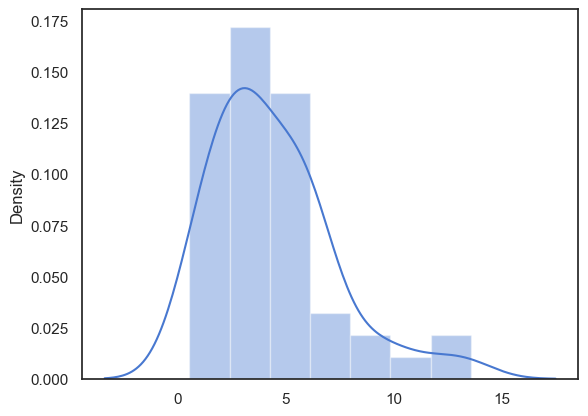

In [14]:
# Calculating sample means and plotting their distribution
df2_sample_means = df2.mean()
sns.distplot(df2_sample_means)

We can observe that even for a small sample size such as 2, the distribution of sample means looks very different from that of the exponential population, and looks more like a poor approximation of a normal distribution, with some positive skew.

In case 2, we will repeat the above process, but with a much larger sample size ($n=500$):

<Axes: ylabel='Density'>

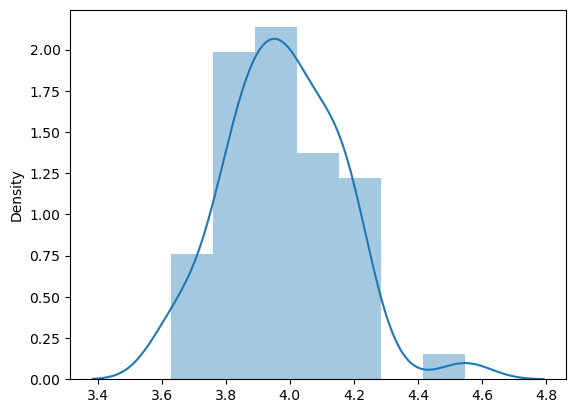

In [4]:
# modify this cell

# Please refer to the previous example to draw 50 random samples of size 500
# Tips: You can use the "np.random.exponential" function to implement a exponential distribution.

#
# YOUR CODE HERE\

sample_size = 500 # 样本大小修改成500每列
df500 = pd.DataFrame(index=range(1, sample_size + 1))

for i in range(1, 51):
    exponential_sample = np.random.exponential(theta, sample_size)
    col = f'sample {i}'
    df500[col] = exponential_sample

# Taking a peek at the samples
df500

# Calculating sample means and plotting their distribution
df500_sample_means = df500.mean()
sns.distplot(df500_sample_means)
#

The sampling distribution looks much more like a normal distribution now as we have sampled with a much larger sample size ($n=500$).

Let us now check the mean and the standard deviation of the 50 sample means:

In [5]:
#The first 5 values from the 50 sample means
df500_sample_means.head()

sample 1    4.039621
sample 2    4.056470
sample 3    4.008401
sample 4    4.079657
sample 5    3.864268
dtype: float64

We can observe that the mean of all the sample means is quite close to the population mean ($\mu = 4$).

Similarly, we can observe that the standard deviation of the 50 sample means is quite close to the value stated by the CLT, i.e., $(\sigma/ \sqrt{n}) = 0.178$.

In [6]:
# modify this cell

# An estimate of the standard deviation of the sampling distribution can be obtained as:

#
# YOUR CODE HERE
sampling_std = df500_sample_means.std()
print("Standard deviation of sampling distribution:", sampling_std)
#

Standard deviation of sampling distribution: 0.1782637369110422


In [7]:
# If you calculate correctly, the above value is very close to the value stated by the CLT, which is:
sd/np.sqrt(sample_size)

0.17888543819998318

Thus, we observe that the mean of all sample means is very close in value to the population mean itself.

Also, we can observe that as we increased the sample size from 2 to 500, the distribution of sample means increasingly starts resembling a normal distribution, with mean given by the population mean $\mu$ and the standard deviation given by $(\sigma / \sqrt{n})$ , as stated by the Central Limit Theorem.

#### 3.2 Experiment 2 -  Binomially distributed population

In the previous example, we knew that the population is exponentially distributed with parameter $\theta=4$.

Now you might wonder what would happen to the sampling distribution if we had a population which followed some other distribution say, Binomial distribution for example.

*Would the sampling distribution still resemble the normal distribution for large sample sizes as stated by the CLT?*

Let's test it out. The following represents our Binomially distributed population (recall that Binomial is a discrete distribution and hence we produce the probability mass function below):

<img style="float: left;width:329px;height:243px" src="figs/probability-function-clt.png">

$P(x) = \cases{\binom k x (p)^x(1-p)^{1-x} & if $x = 0, 1, 2,..., k$ \cr0 & \text{otherwise}}$

where, $0\leq p\leq 1$

As before, we follow a similar approach and plot the sampling distribution obtained with a large sample size ($n = 500$) for a Binomially distributed variable with parameters $k = 30$ and $p = 0.9$

,sample 1,sample 2,sample 3,sample 4,sample 5,sample 6,sample 7,sample 8,sample 9,sample 10,...,sample 41,sample 42,sample 43,sample 44,sample 45,sample 46,sample 47,sample 48,sample 49,sample 50
1,29,26,26,28,25,28,28,25,27,29,...,24,27,27,29,25,25,27,27,27,28
2,27,28,23,26,27,29,28,28,27,24,...,27,26,26,26,28,26,26,28,28,26
3,28,27,28,27,27,29,27,25,27,29,...,27,28,28,27,25,26,29,29,29,28
4,28,27,27,28,29,27,29,29,28,30,...,27,28,28,27,29,27,28,26,30,27
5,25,26,28,28,28,27,24,25,28,24,...,26,28,28,26,25,28,29,28,28,29
6,27,26,28,28,30,28,23,27,30,28,...,27,30,28,27,27,27,27,29,26,27
7,29,29,25,29,27,26,27,27,28,26,...,26,25,26,26,26,25,28,28,27,30
8,24,27,26,27,29,27,26,29,25,30,...,23,27,28,25,27,26,28,29,30,25
9,29,27,29,27,27,29,26,29,27,27,...,29,26,27,30,28,25,29,27,28,25
10,26,29,26,28,28,25,27,28,25,28,...,27,27,27,28,25,27,30,28,25,24


<Axes: ylabel='Density'>

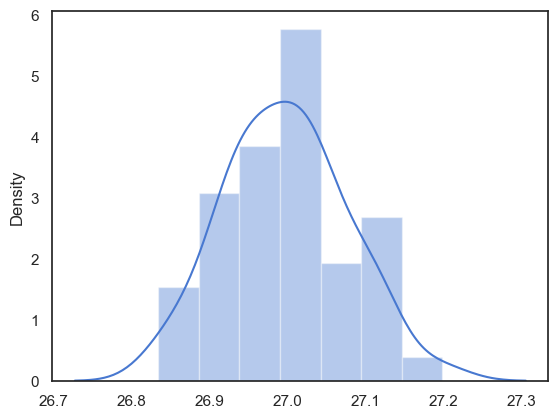

In [19]:
# modify this cell

# modify this cell

# drawing 50 random samples of size 500 from a Binomial distribution with parameters k= 30 and p=0.9
# Tips: You can use the "np.random.binomial" function to implement a binomial distribution.

#
# YOUR CODE HERE


sample_size = 500
k = 30
p = 0.9
df500_binomial = pd.DataFrame(index= range(1, sample_size + 1))

for i in range(1, 51):
    binomial_sample = np.random.binomial(k, p, sample_size)
    col = f'sample {i}'
    df500_binomial[col] = binomial_sample

# Taking a peek at the samples
df500_binomial

# Calculating sample means and plotting their distribution
df500_binomial_sample_means = df500_binomial.mean()
sns.distplot(df500_binomial_sample_means)
#
#

For this experiment, as we assumed that our population follows a Binomial distribution with parameters $k = 30$ and $p = 0.9$

Which means if CLT were to hold, the sampling distribution should be approximately normal with mean = population mean = $\mu= 27$ and standard deviation = $\sigma/\sqrt{n} = 0.0734$.

In [20]:
# modify this cell

# Please compute the mean of sample means. If you calculate correctly, mean of sample means is close to the population mean.

#
# YOUR CODE HERE
sampling_mean = np.mean(df500_binomial_sample_means)
print("Mean of sample means:", sampling_mean)
#

Mean of sample means: 26.99712


In [21]:
# modify this cell

# Please compute the standard deviation of sample means. If you calculate correctly, standard deviation of sample means is close to population standard deviation divided by square root of sample size.

#
# YOUR CODE HERE
sampling_std = df500_binomial_sample_means.std()
print("Standard deviation of sampling distribution:", sampling_std)
#

Standard deviation of sampling distribution: 0.07797556917237028


And the CLT holds again, as can be seen in the above results.

The sampling distribution for a Binomially distributed population also tends to a normal distribution with mean $\mu$ and standard deviation $\sigma/\sqrt{n}$ for large sample size.

## 3.2 An Application of CLT in Investing/Trading

### 3.2.1 The Challenge for Investors

A common challenge that an investor faces is to determine whether a stock is likely to meet her investing goals. For example, consider Jyoti, who is looking to invest in a safe stock for the next five years.

Being a risk averse investor, she would only feel comfortable to invest in a stock if it gives preferably non-negative monthly returns on average and where she can be reasonably confident that her average monthly return will not be less than -0.5%.

Jyoti is very interested in the ITC (NSE: ITC) stock, but wants to make sure that it meets her criterion. In such a case, *is there some theoretical/statistical framework which can help her to reach a conclusion about the average monthly return of the ITC stock with some confidence?*

The answer is yes! And such a statistical framework is based on the assumption of the return distribution, which in turn is based on the Central Limit Theorem (CLT).

In the next section, we start conducting our analysis on the ITC stock data.

### 3.2.2 The Great Assumption of Normality in Finance

In finance models (like the Black-Scholes option pricing model), we usually assume that the price series is log-normally distributed, and so returns are normally distributed.

And so for investors and traders, who use these models to invest or trade in the market, a lot depends on whether or not the assumption of normality actually holds in the markets.

Let us check it out for the ITC (NSE: ITC) stock in which Jyoti is interested. To conduct the analysis, we first import some standard Python libraries and fetch the daily Close-Close ITC stock data from the yfinance library.

**Please try to do a visual analysis of the distribution of daily returns.**

In [2]:
# standard imports
!pip install pyfolio
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyfolio as pf
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', None)

# Fetching the ITC stock data from yfinance library for the past 10 years
ITC = pd.read_csv('ITC.NS.csv')

daily_data = ITC.copy().round(4)

# Calculating daily Log returns
daily_data['daily_return']= np.log(daily_data['Adj Close']/daily_data['Adj Close'].shift())
daily_data.dropna(inplace=True)

# Taking a peek at the fetched data
daily_data.head()

D:\anaconda\Lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


,Date,Adj Close,daily_return
1,2010/1/5,65.9113,0.009808
2,2010/1/6,66.0656,0.002338
3,2010/1/7,65.8598,-0.003120
4,2010/1/8,66.0013,0.002146
5,2010/1/11,66.0270,0.000389


Now that we have the daily log returns for ITC. **Please visualize both the returns and their distribution according to the diagrams below.**

<img style="float: center;width:508px;height:370px" src="figs/actual-values-of-daily-log-returns-over-time-1.png">
<img style="float: center;width:469px;height:371px" src="figs/distribution-of-daily-log-returns.png">

<Figure size 1200x500 with 0 Axes>

<Axes: >

<Axes: ylabel='daily_return'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Daily Log Return')

Text(0.5, 1.0, 'Daily Log Returns')

<Axes: >

<Axes: xlabel='daily_return', ylabel='Count'>

Text(0.5, 0, 'Daily Log Return')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Daily Log Returns')

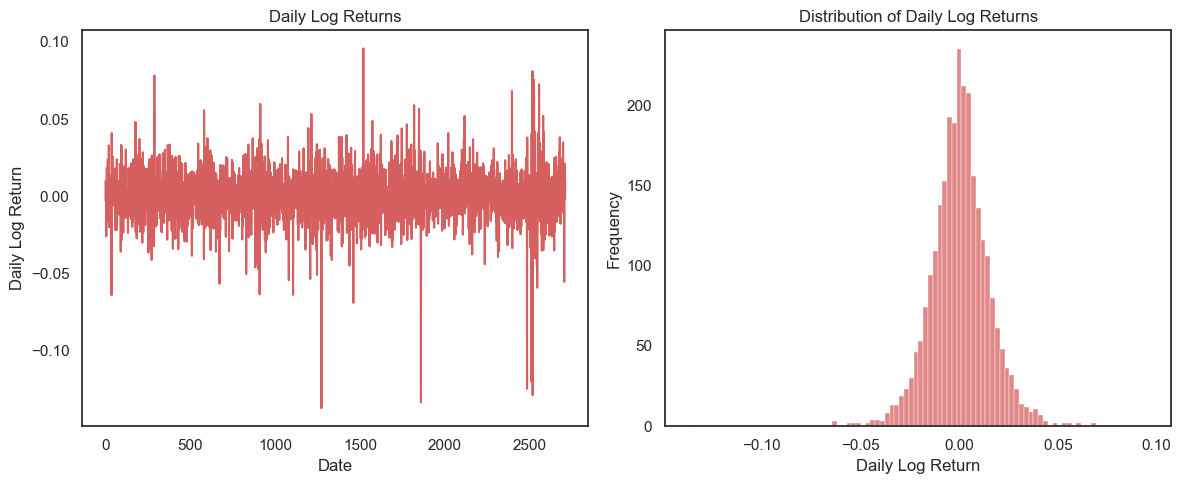

In [4]:
# modify this cell

# Visualizing the daily log returns
sns.set(style="white", palette="muted", color_codes=True)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)

# Plot a simple histogram with binsize determined automatically.
# Please add the labels of the x, y axes and titles in the figure.
# Tips: sns.lineplot(daily_data.index,daily_data['daily_return'], color="r")

#
# YOUR CODE HERE

sns.lineplot(daily_data['daily_return'], color="r")
plt.xlabel('Date')  # 添加 x 轴标签
plt.ylabel('Daily Log Return')  # 添加 y 轴标签
plt.title('Daily Log Returns')  # 添加图表标题

#

plt.subplot(1,2,2)

# Plot a simple histogram with binsize determined automatically.
# Please add the labels of the x, y axes and titles in the figure.
# Tips: sns.distplot(daily_data['daily_return'], kde=False, color="r")
#  系统警告说，使用histplot函数是更好的方案

#
# YOUR CODE HERE

sns.histplot(daily_data['daily_return'], kde=False, color="r")
plt.xlabel('Daily Log Return')  # 添加 x 轴标签
plt.ylabel('Frequency')  # 添加 y 轴标签
plt.title('Distribution of Daily Log Returns')  # 添加图表标题
#

# Remember to use the command to visualize.
# You can use "plt.tight_layout()" to make the layout more beautiful. 
plt.tight_layout()
plt.show()

We can observe that in the ten years we are using, the daily return for ITC is centred around 0. However, there have been multiple occasions when it has breached the five percent mark on the upside and even a negative ten percent mark on the downside.

This is what is responsible for the higher kurtosis or the fat-tails which is not the case with a normal distribution. The plot of the distribution of daily returns also looks leptokurtik.

## 3.3 More visualization exercises

A continuous random variable is a random variable that represents an infinite number of outcomes. If we sample a continuous random variable $X$, the obtained samples may not cover the whole sample space. Since the sample space of a continuous distribution has infinite number of observations, to estimate the exact distribution of the random variable we need infinite number of samples. Since this is not practically possible, we can use parameterized continuous distributions to approximate the observed distribution.

In this assignment we will use the [hourly weather dataset](https://www.kaggle.com/selfishgene/historical-hourly-weather-data/data) and look at the temperature recording for the city of Detroit. We will use continuous distributions we have studied to approximate the observed distributions.

**Useful functions:**
The module **scipy.stats** has an extensive number of probability distributions and useful statistical function definitions.

For plotting the probability density of the data use the  function in the library **matplotlib.pyplot** and set the argument **density=True**. How this function estimates the probability is outlined in matplotlib library documentation.

(array([2.000e+00, 0.000e+00, 1.000e+00, 5.000e+00, 3.000e+00, 2.000e+00,
        4.000e+00, 4.000e+00, 8.000e+00, 6.000e+00, 1.500e+01, 1.700e+01,
        1.500e+01, 1.400e+01, 1.600e+01, 2.600e+01, 2.100e+01, 3.500e+01,
        5.900e+01, 6.500e+01, 7.200e+01, 7.000e+01, 9.100e+01, 1.060e+02,
        1.310e+02, 1.530e+02, 1.780e+02, 1.990e+02, 1.810e+02, 2.090e+02,
        2.280e+02, 2.710e+02, 3.030e+02, 3.030e+02, 3.310e+02, 4.130e+02,
        4.270e+02, 4.210e+02, 4.910e+02, 4.430e+02, 5.230e+02, 5.880e+02,
        7.220e+02, 7.120e+02, 7.170e+02, 7.250e+02, 7.630e+02, 9.180e+02,
        8.600e+02, 9.330e+02, 9.430e+02, 9.450e+02, 8.550e+02, 7.770e+02,
        7.890e+02, 8.770e+02, 8.200e+02, 7.810e+02, 7.750e+02, 7.540e+02,
        7.620e+02, 7.150e+02, 8.040e+02, 8.330e+02, 7.670e+02, 7.770e+02,
        8.050e+02, 8.240e+02, 8.040e+02, 8.230e+02, 8.370e+02, 8.750e+02,
        8.180e+02, 9.740e+02, 9.460e+02, 9.260e+02, 1.001e+03, 1.014e+03,
        9.980e+02, 9.760e+02, 1.000e+0

Text(0.5, 0, 'Temperature')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of Temperature in Detroit')

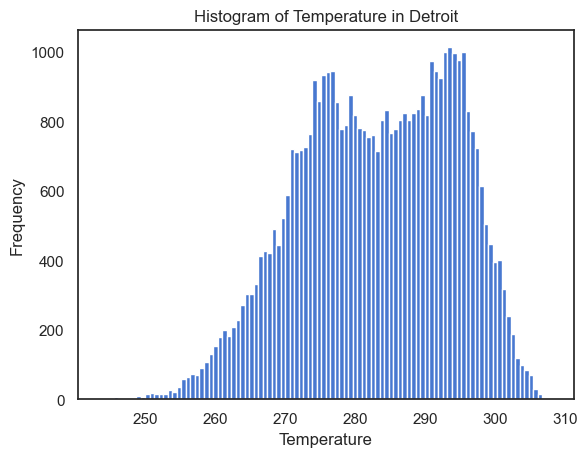

In [6]:
# modify this cell

# Please plot a histogram with 100 bins using all the samples.
# Please add the labels of the x, y axes and titles in the figure.

#
# YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

data = pd.read_csv('temperature.csv', parse_dates=[0], index_col=0)
detroit_data = data['Detroit']  # 假设底特律的数据列名为 'Detroit'

plt.hist(detroit_data, bins=100)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature in Detroit')
plt.show()

If you plot it correctly, you will get a histogram similar to the one below.

<img style="float: left;width:393px;height:305px" src="figs/histogram.png">

Additional credits: Create more plot from the temperature recording of different cities. For example, the 7 Day Moving Average Plot, the temparature variation of different cities in a single figure, the visualization of humidity, pressure and temperature of Detroit in a single figure. **Insert new cells for these figures**

(array([   4.,   16.,   57.,   95.,  207.,  334.,  452.,  556.,  691.,
         726., 1006., 1057., 1262., 1307.,  874., 1485., 1773., 2079.,
        1848., 2355., 2311., 2888., 2471., 3139., 2182., 3858., 1708.,
        3673., 1322., 2655.]),
 array([ 12.        ,  14.93333333,  17.86666667,  20.8       ,
         23.73333333,  26.66666667,  29.6       ,  32.53333333,
         35.46666667,  38.4       ,  41.33333333,  44.26666667,
         47.2       ,  50.13333333,  53.06666667,  56.        ,
         58.93333333,  61.86666667,  64.8       ,  67.73333333,
         70.66666667,  73.6       ,  76.53333333,  79.46666667,
         82.4       ,  85.33333333,  88.26666667,  91.2       ,
         94.13333333,  97.06666667, 100.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 0, 'Humidity')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of Humidity in Detroit')

(array([   5.,   11.,   19.,   52.,   66.,  165.,  264.,  473.,  653.,
         911., 1219., 1501., 2068., 2426., 2967., 2977., 2739., 2600.,
        2544., 2616., 2754., 2850., 3203., 3312., 2894., 1855., 1259.,
         581.,  243.,   25.]),
 array([243.48333333, 245.63555556, 247.78777778, 249.94      ,
        252.09222222, 254.24444444, 256.39666667, 258.54888889,
        260.70111111, 262.85333333, 265.00555556, 267.15777778,
        269.31      , 271.46222222, 273.61444444, 275.76666667,
        277.91888889, 280.07111111, 282.22333333, 284.37555556,
        286.52777778, 288.68      , 290.83222222, 292.98444444,
        295.13666667, 297.28888889, 299.44111111, 301.59333333,
        303.74555556, 305.89777778, 308.05      ]),
 <BarContainer object of 30 artists>)

Text(0.5, 0, 'Temperature')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of Temperature in Detroit')

(array([   9.,   17.,   94.,  136.,  207.,  569.,  741.,  960., 1957.,
        2128., 3577., 3671., 4179., 6724., 3790., 3210., 3590., 2130.,
        2007., 1986.,  915., 1137.,  453.,  385.,  389.,   99.,   75.,
          65.,   28.,   20.]),
 array([ 986.        ,  988.36666667,  990.73333333,  993.1       ,
         995.46666667,  997.83333333, 1000.2       , 1002.56666667,
        1004.93333333, 1007.3       , 1009.66666667, 1012.03333333,
        1014.4       , 1016.76666667, 1019.13333333, 1021.5       ,
        1023.86666667, 1026.23333333, 1028.6       , 1030.96666667,
        1033.33333333, 1035.7       , 1038.06666667, 1040.43333333,
        1042.8       , 1045.16666667, 1047.53333333, 1049.9       ,
        1052.26666667, 1054.63333333, 1057.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 0, 'Pressure')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of Pressure in Detroit')

(array([1.8110e+03, 6.9490e+03, 0.0000e+00, 1.0146e+04, 0.0000e+00,
        9.1640e+03, 0.0000e+00, 7.7450e+03, 4.1020e+03, 0.0000e+00,
        2.5700e+03, 0.0000e+00, 1.4510e+03, 0.0000e+00, 7.6800e+02,
        3.3500e+02, 0.0000e+00, 1.1800e+02, 0.0000e+00, 5.6000e+01,
        0.0000e+00, 2.4000e+01, 6.0000e+00, 0.0000e+00, 4.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.        ,  0.56666667,  1.13333333,  1.7       ,  2.26666667,
         2.83333333,  3.4       ,  3.96666667,  4.53333333,  5.1       ,
         5.66666667,  6.23333333,  6.8       ,  7.36666667,  7.93333333,
         8.5       ,  9.06666667,  9.63333333, 10.2       , 10.76666667,
        11.33333333, 11.9       , 12.46666667, 13.03333333, 13.6       ,
        14.16666667, 14.73333333, 15.3       , 15.86666667, 16.43333333,
        17.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 0, 'Wind Speed')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of Wind Speed in Detroit')

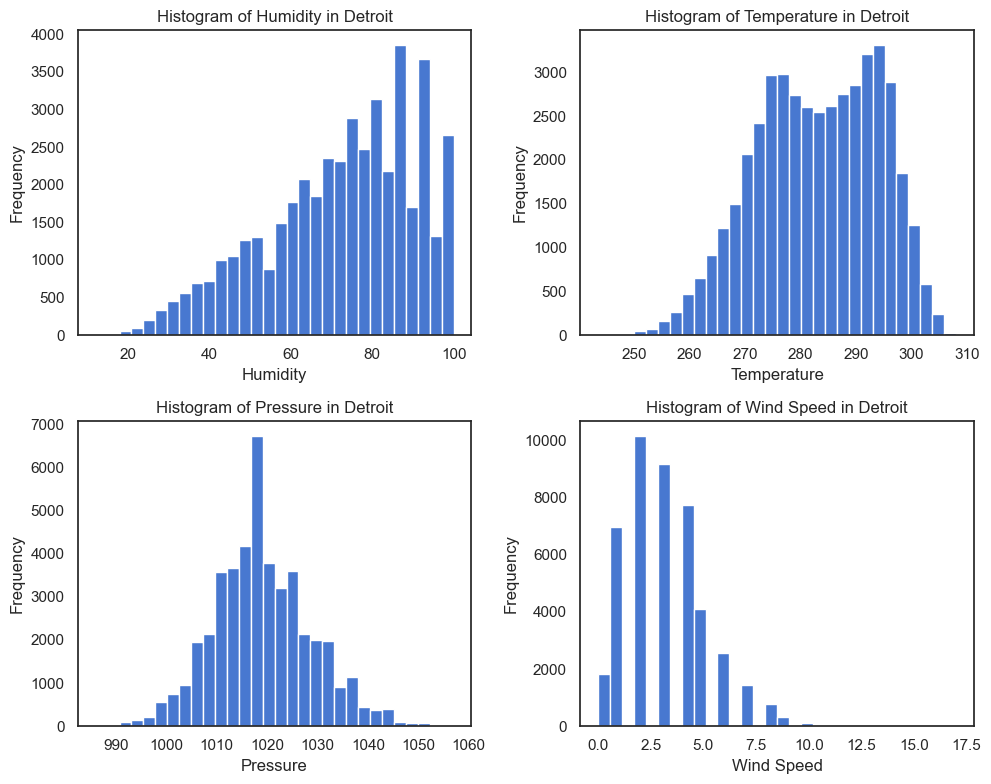

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

humidity_data = pd.read_csv('humidity.csv', parse_dates=[0], index_col=0)
temperature_data = pd.read_csv('temperature.csv', parse_dates=[0], index_col=0)
pressure_data = pd.read_csv('pressure.csv', parse_dates=[0], index_col=0)
wind_speed_data = pd.read_csv('wind_speed.csv', parse_dates=[0], index_col=0)

detroit_humidity = humidity_data['Detroit']
detroit_temperature = temperature_data['Detroit']
detroit_pressure = pressure_data['Detroit']
detroit_wind_speed = wind_speed_data['Detroit']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].hist(detroit_humidity, bins=30)
axs[0, 0].set_xlabel('Humidity')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Histogram of Humidity in Detroit')

axs[0, 1].hist(detroit_temperature, bins=30)
axs[0, 1].set_xlabel('Temperature')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Histogram of Temperature in Detroit')

axs[1, 0].hist(detroit_pressure, bins=30)
axs[1, 0].set_xlabel('Pressure')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Histogram of Pressure in Detroit')

axs[1, 1].hist(detroit_wind_speed, bins=30)
axs[1, 1].set_xlabel('Wind Speed')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Histogram of Wind Speed in Detroit')

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Temperature (°C)')

Text(0.5, 1.0, 'Temperature in Detroit')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Temperature (°C)')

Text(0.5, 1.0, 'Temperature in New York')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Temperature (°C)')

Text(0.5, 1.0, 'Temperature in Chicago')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Temperature (°C)')

Text(0.5, 1.0, 'Temperature in Los Angeles')

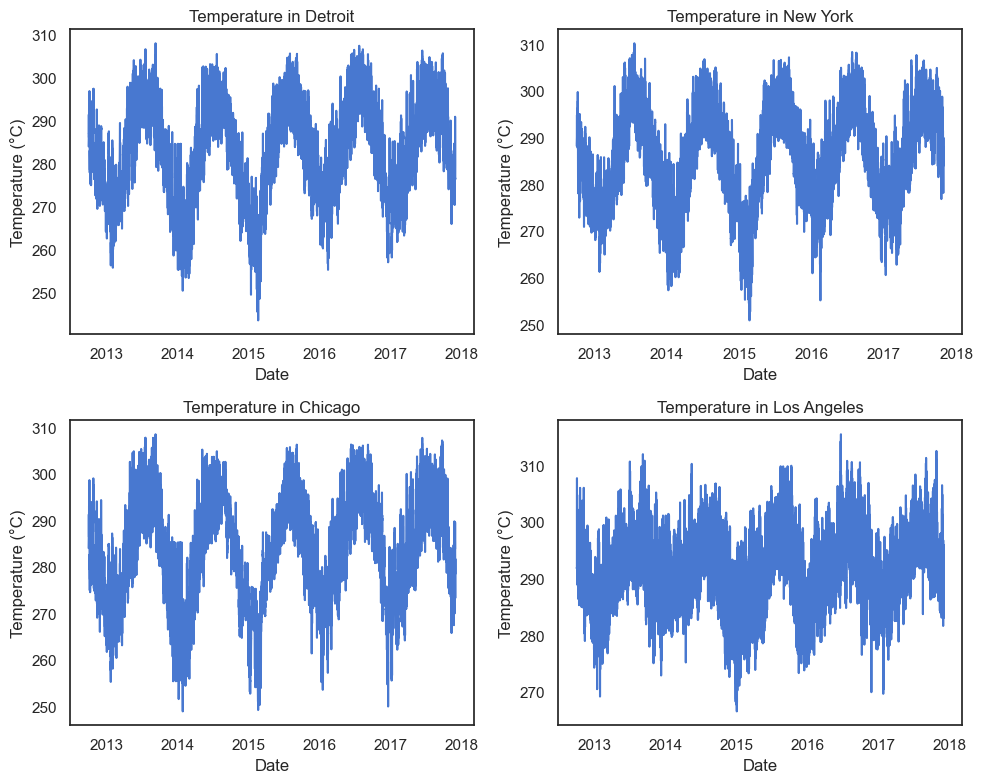

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('temperature.csv', parse_dates=[0], index_col=0)

cities = ['Detroit', 'New York', 'Chicago', 'Los Angeles']
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, city in enumerate(cities):
    row = i // 2
    col = i % 2
    city_data = data[city]
    axs[row, col].plot(city_data.index, city_data.values)
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel('Temperature (°C)')
    axs[row, col].set_title(f'Temperature in {city}')

plt.tight_layout()
plt.show()
